In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [4]:
%run load_data.ipynb  

In [5]:
data = load_processed_data()

In [6]:
data.sample(10)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_latitude,end_station_longitude,start_hour,end_hour,distance,day_of_week,day_name,month,month_name,year
148693,2020-03-18 21:39:05.986000+00:00,2020-03-18 21:53:51.908000+00:00,885,289,Castle Street,Near Rose Street,55.951501,-3.203184,250,Victoria Quay,...,55.977617,-3.174126,21,21,3427.596249,2,Wednesday,3,March,2020
71209,2019-08-20 16:51:53.494000+00:00,2019-08-20 17:00:24.057000+00:00,510,248,Bristo Square,"Bristo Square, near Potterrow",55.945834,-3.189053,249,Fountainbridge,...,55.943357,-3.209248,16,17,1291.571798,1,Tuesday,8,August,2019
105498,2019-11-06 13:53:15.136000+00:00,2019-11-06 14:03:04.219000+00:00,589,254,Kings Building 3,Kings Building House,55.923479,-3.175385,1017,Crichton Street,...,55.944784,-3.186906,13,14,2479.051314,2,Wednesday,11,November,2019
6559,2019-02-15 16:16:15.863000+00:00,2019-02-15 16:26:06.535000+00:00,590,265,Meadows East,Melville Terrace,55.939809,-3.182739,249,Fountainbridge,...,55.943357,-3.209248,16,16,1702.882072,4,Friday,2,February,2019
92757,2019-10-03 14:44:25.658000+00:00,2019-10-03 15:01:45.072000+00:00,1039,355,Inverleith Row,Corner of Inverleith Row & Inverleith Terrace,55.964146,-3.202074,356,East London Street,...,55.959943,-3.187329,14,15,1032.889970,3,Thursday,10,October,2019
44688,2019-06-21 15:59:02.017000+00:00,2019-06-21 18:28:57.877000+00:00,8995,250,Victoria Quay,Entrance to Scottish Government Office,55.977617,-3.174126,250,Victoria Quay,...,55.977617,-3.174126,15,18,0.000000,4,Friday,6,June,2019
15947,2019-04-02 19:59:21.482000+00:00,2019-04-02 20:10:26.963000+00:00,665,171,George Square,"George Square, south side in front of Universi...",55.943084,-3.188311,261,Brunswick Place,...,55.960930,-3.181005,19,20,2038.696990,1,Tuesday,4,April,2019
120154,2019-12-26 14:34:28.904000+00:00,2019-12-26 15:17:08.368000+00:00,2559,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332,264,Pollock Halls,...,55.940081,-3.171747,14,15,3883.207992,3,Thursday,12,December,2019
80161,2019-09-07 16:12:17.260000+00:00,2019-09-07 16:29:37.057000+00:00,1039,248,Bristo Square,"Bristo Square, near Potterrow",55.945834,-3.189053,879,Gladstone Terrace,...,55.938024,-3.184979,16,16,905.993008,5,Saturday,9,September,2019
52399,2019-07-12 11:33:53.415000+00:00,2019-07-12 11:47:31.909000+00:00,818,289,Castle Street,Near Rose Street,55.951501,-3.203184,341,Warrender Park Road,...,55.938363,-3.198031,11,11,1497.771171,4,Friday,7,July,2019


In [108]:
#data.groupby(["year", "month"]).count()

In [7]:
%matplotlib inline
sns.countplot(x="year", data=data)

NameError: name 'sns' is not defined

In [18]:
%matplotlib inline
sns.countplot(x="month_name", data=data[data.year == 2019])

NameError: name 'sns' is not defined

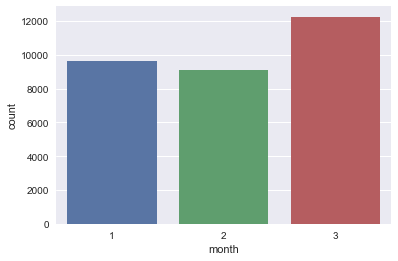

In [128]:
%matplotlib inline
sns.countplot(x="month_name", data=data[data.year == 2020])